# 1.7 アイリスのクラス分類
## 訓練と評価の過程

In [12]:
import numpy as np
from scipy import sparse
from IPython.display import display

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("Key on iris_dataset:\n{}".format(iris_dataset.keys()))

Key on iris_dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [3]:
for key in iris_dataset.keys():
    print("####### key: {} ########".format(key))
    print(iris_dataset[key])

####### key: data ########
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [5]:
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe['target'] = pd.DataFrame(y_train)

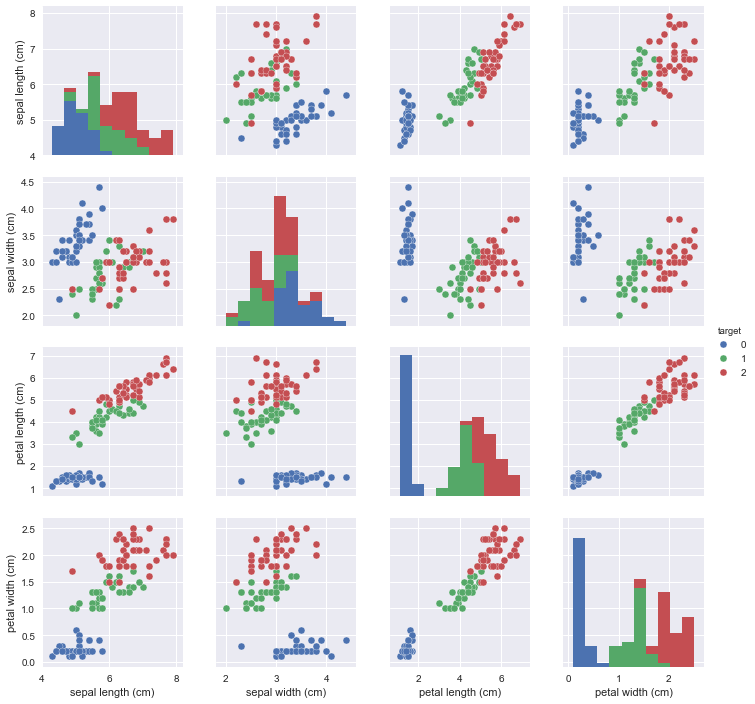

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data = iris_dataframe, hue="target", vars=iris_dataset.feature_names)
plt.show()

In [7]:
from sklearn.neighbors import KNeighborsClassifier
# 訓練データからモデルを構築するアルゴリズムと新しいデータポイントに対して予測するためのアルゴリズムのカプセル化
knn = KNeighborsClassifier(n_neighbors=1)

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [10]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n{}".format(y_pred))

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [11]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


## 最小の手順

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
                    iris_dataset['data'], iris_dataset['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
